In [2]:
import keras

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
df=pd.read_csv('data.csv')

In [68]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [70]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [71]:
x=df.iloc[:,3:13]
y=df.iloc[:,13]

In [73]:
x.shape

(10000, 10)

In [74]:
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [75]:
x=pd.concat([x,geography,gender],axis=1)

In [76]:
x=x.drop(['Geography','Gender'],axis=1)

In [85]:
x

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Germany  Spain  Male  
0                  1        101348.88        0      0     0  
1                  1        112542.58        0      1     0  
2                  0        113931.57        0      0     0  
3                  0         93826.63        0      0     0  
4                  1         79084.10        0      1     0  
...              ...              ...      ...    ...   ...  
9995               0         96270.64        0      0     1  
9996               1        101699.77        0      0     1  
9997               1         42085.58        0      0     0  
9998               0         92888.52        1      0     1  
9999               0         38190.78        0      0     0  

[10000 rows x 11 columns]

In [78]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [87]:
x_test.shape

(3000, 11)

In [88]:
##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [90]:
from keras.models import Sequential
from keras.layers import Dense,PReLU,ELU,Dropout,LeakyReLU

In [91]:
classifier=Sequential()

In [94]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

In [95]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

In [97]:
classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))

In [98]:
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [100]:
model_history=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
469/469 [==============================] - 3s 3ms/step - loss: 0.5873 - accuracy: 0.7656 - val_loss: 0.5501 - val_accuracy: 0.7880
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5367 - accuracy: 0.7948 - val_loss: 0.5171 - val_accuracy: 0.7919
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5063 - accuracy: 0.7991 - val_loss: 0.4956 - val_accuracy: 0.7940
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4855 - accuracy: 0.8034 - val_loss: 0.4829 - val_accuracy: 0.7949
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4726 - accuracy: 0.8038 - val_loss: 0.4756 - val_accuracy: 0.7971
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4644 - accuracy: 0.8042 - val_loss: 0.4709 - val_accuracy: 0.7975
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4583 - accuracy: 0.8083 - val_loss: 0.4673 - val_accuracy: 0.7966

Epoch 58/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3639 - accuracy: 0.8496 - val_loss: 0.3907 - val_accuracy: 0.8386
Epoch 59/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3624 - accuracy: 0.8503 - val_loss: 0.3892 - val_accuracy: 0.8395
Epoch 60/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3611 - accuracy: 0.8499 - val_loss: 0.3876 - val_accuracy: 0.8408
Epoch 61/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3595 - accuracy: 0.8520 - val_loss: 0.3864 - val_accuracy: 0.8390
Epoch 62/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3584 - accuracy: 0.8533 - val_loss: 0.3848 - val_accuracy: 0.8399
Epoch 63/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3573 - accuracy: 0.8526 - val_loss: 0.3834 - val_accuracy: 0.8395
Epoch 64/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3562 - accuracy: 0.8546 - val_loss: 0.3822 - val_accuracy:

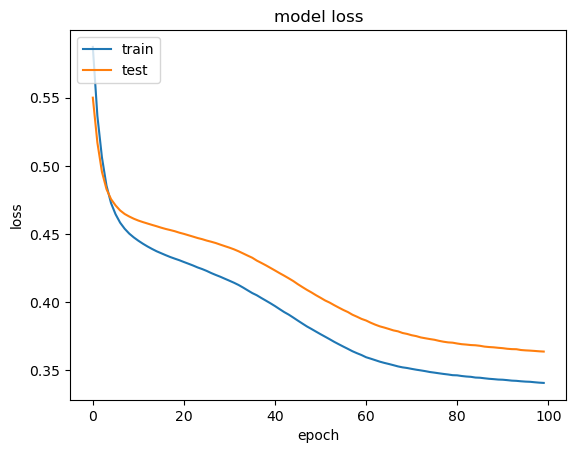

94/94 [==============================] - 0s 1ms/step


In [102]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


In [103]:
cm

array([[2320,   96],
       [ 332,  252]], dtype=int64)

In [104]:
score

0.8573333333333333

In [106]:
#HyperParameter Tunning
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid



def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=x_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)


layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

grid_result = grid.fit(x_train, y_train)

[grid_result.best_score_,grid_result.best_params_]

C:\Users\User\AppData\Local\Temp\ipykernel_11508\2326234452.py:28: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


[0.8525714159011841,
 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': [40, 20]}]